## Import TensorFlow and other libraries

It's good practice to use a validation split when developing your model. Let's use 80% of the images for training, and 20% for validation.

In [10]:
batch_size = 32
img_height = 224
img_width = 224

In [14]:
import tensorflow as tf

data_dir = "D:/CNN-With/data/"
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.9,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9059 files belonging to 7 classes.
Using 8153 files for validation.


In [15]:
class_names = val_ds.class_names
print(class_names)

['CDM', 'HT', 'MDMV', 'NCLB', 'SCLB', 'SCMV', 'SR']


In [16]:
AUTOTUNE = tf.data.AUTOTUNE
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [17]:
from tensorflow.keras import layers
normalization_layer = layers.Rescaling(1./255)

In [18]:
import tensorflow as tf

# Define the path where the model is saved (in H5 format)
saved_model_path = "D:/CNN-With/Trained_Model_Cnn/model.h5"

# Load the model using tf.keras.models.load_model()
model = tf.keras.models.load_model(saved_model_path)

# Print the model summary to verify it's loaded correctly
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 224, 224, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 112, 112, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     6,422,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,447,144 (24.59 MB)

 Trainable params: 6,447,143 (24.59 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1 (8.00 B)

In [19]:
val_image_batch, val_label_batch = next(iter(val_ds))
true_label_ids = np.argmax(val_label_batch, axis=-1)
print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (32, 224, 224, 3)


In [20]:
import tensorflow as tf
import pandas as pd

# Assuming model and class_names are already defined

# Get the predictions from the model
tf_model_predictions = model.predict(val_image_batch)

# If the model has logits as output (from_logits=True in loss), apply softmax to get probabilities
if 'from_logits' in model.loss.get_config() and model.loss.get_config()['from_logits']:
    tf_model_predictions = tf.nn.softmax(tf_model_predictions).numpy()

# Convert predictions to a DataFrame
tf_pred_dataframe = pd.DataFrame(tf_model_predictions)

# Set the DataFrame columns to class names
tf_pred_dataframe.columns = class_names

# Print the first few predictions to check
print("Prediction results for the first elements")
print(tf_pred_dataframe.head())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Prediction results for the first elements
            CDM            HT          MDMV          NCLB          SCLB  \
0  1.208003e-06  8.067226e-22  3.592722e-08  7.564961e-09  2.511757e-09   
1  5.647014e-19  1.000000e+00  2.927233e-32  2.103298e-17  6.981948e-17   
2  0.000000e+00  1.000000e+00  0.000000e+00  2.186388e-35  0.000000e+00   
3  7.732541e-14  1.956271e-22  1.258508e-16  4.553558e-12  1.000000e+00   
4  0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

           SCMV            SR  
0  9.999988e-01  1.720512e-20  
1  2.522970e-25  0.000000e+00  
2  0.000000e+00  0.000000e+00  
3  2.523559e-12  1.198354e-18  
4  0.000000e+00  0.000000e+00  


In [24]:
import tensorflow as tf
import pandas as pd
import numpy as np

# Assuming class_names and val_ds are already defined

# Initialize lists to store true labels and predictions
all_true_labels = []
all_predicted_classes_thresholded = []
all_pred_confidences = []

# Loop through the entire validation dataset
for images, labels in val_ds:
    # Get the true labels for this batch
    all_true_labels.extend(labels.numpy())  # Store true labels

    # Get the predictions from the model for this batch
    tf_model_predictions = model.predict(images)

    # If the model has logits as output (from_logits=True in loss), apply softmax to get probabilities
    if 'from_logits' in model.loss.get_config() and model.loss.get_config()['from_logits']:
        tf_model_predictions = tf.nn.softmax(tf_model_predictions).numpy()

    # Convert predictions to a DataFrame
    tf_pred_dataframe = pd.DataFrame(tf_model_predictions)

    # Set the DataFrame columns to class names
    tf_pred_dataframe.columns = class_names

    # Apply thresholding to make predictions more confident
    threshold = 0.5  # You can change this value
    predicted_classes_thresholded = tf_pred_dataframe.apply(
        lambda x: x.idxmax() if x.max() >= threshold else 'Uncertain', axis=1
    )
    
    # Store the predicted classes and prediction confidences
    all_predicted_classes_thresholded.extend(predicted_classes_thresholded)
    all_pred_confidences.extend(tf_pred_dataframe.max(axis=1))

# Convert true labels to class names
true_labels_class = [class_names[label] for label in all_true_labels]

# Create a DataFrame to show both true and predicted labels for the entire dataset
comparison_df = pd.DataFrame({
    'True Label': true_labels_class,
    'Predicted Label': all_predicted_classes_thresholded,
    'Prediction Confidence': all_pred_confidences
})

# Print the first few rows of the comparison
print("True vs Predicted Labels for all elements:")
print(comparison_df.head())

# Optionally, you can save this DataFrame to a CSV to examine it later
# comparison_df.to_csv("predictions_vs_true_labels.csv", index=False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━

Confusion Matrix:

       CDM   HT  MDMV  NCLB  SCLB  SCMV   SR
CDM   1525    0     0     0     0     0    0
HT       0  911     0     0     0     0    0
MDMV     0    0  1174     0     0     0    0
NCLB     0    0     0  1335     4     0    0
SCLB     0    0     0     0  1081     0    0
SCMV    17    0     0     0     0  1261    0
SR       0    0     0     0     8     0  837

Precision, Recall, and F1-Score for each class:

      Precision    Recall  F1-Score
CDM    0.988975  1.000000  0.994457
HT     1.000000  1.000000  1.000000
MDMV   1.000000  1.000000  1.000000
NCLB   1.000000  0.997013  0.998504
SCLB   0.989021  1.000000  0.994480
SCMV   1.000000  0.986698  0.993304
SR     1.000000  0.990533  0.995244

Average Precision: 0.9969
Average Recall: 0.9963
Average F1-Score: 0.9966

Mean Precision: 0.9969
Mean Recall: 0.9963
Mean F1-Score: 0.9966

Standard Deviation of Precision: 0.0050
Standard Deviation of Recall: 0.0051
Standard Deviation of F1-Score: 0.0026


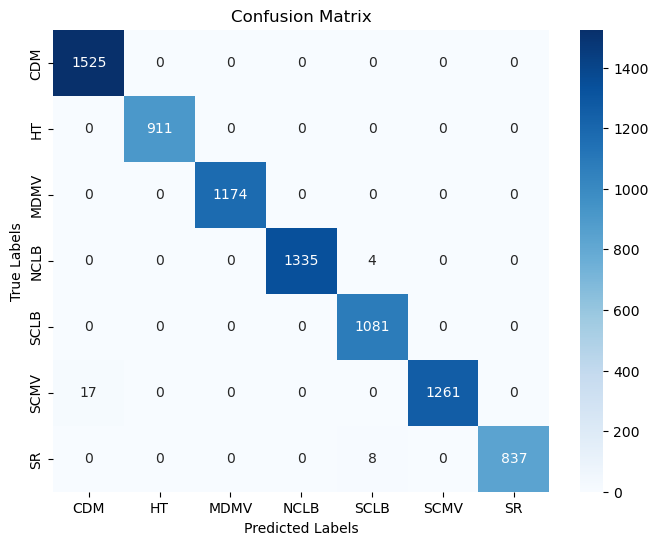

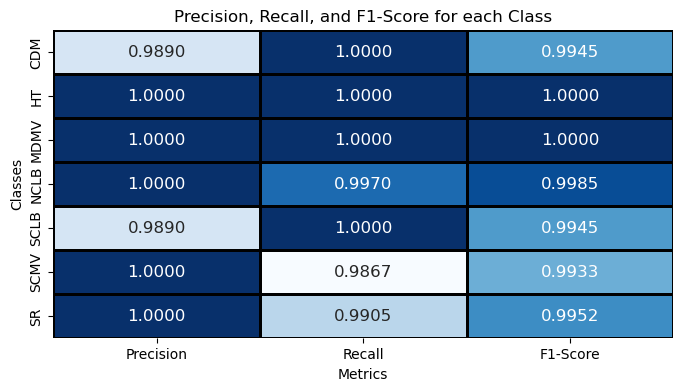

In [25]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Assuming class_names, true_labels_class, and all_predicted_classes_thresholded are already defined

# Calculate the confusion matrix
cm = confusion_matrix(true_labels_class, all_predicted_classes_thresholded, labels=class_names)

# Convert confusion matrix to DataFrame for better readability
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

# Calculate Precision and Recall for each class
precision = precision_score(true_labels_class, all_predicted_classes_thresholded, average=None, labels=class_names)
recall = recall_score(true_labels_class, all_predicted_classes_thresholded, average=None, labels=class_names)

# Calculate F1-Score for each class
f1 = f1_score(true_labels_class, all_predicted_classes_thresholded, average=None, labels=class_names)

# Create a DataFrame to show precision, recall, and f1-score
metrics_df = pd.DataFrame({
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
}, index=class_names)

# Print confusion matrix and metrics
print("Confusion Matrix:\n")
print(cm_df)

print("\nPrecision, Recall, and F1-Score for each class:\n")
print(metrics_df)

# Optionally, calculate average precision, recall, and F1-Score
average_precision = precision_score(true_labels_class, all_predicted_classes_thresholded, average='macro')
average_recall = recall_score(true_labels_class, all_predicted_classes_thresholded, average='macro')
average_f1 = f1_score(true_labels_class, all_predicted_classes_thresholded, average='macro')

# Calculate mean and standard deviation for Precision, Recall, and F1-Score
mean_precision = np.mean(precision)
mean_recall = np.mean(recall)
mean_f1 = np.mean(f1)

std_precision = np.std(precision)
std_recall = np.std(recall)
std_f1 = np.std(f1)

# Print the averages, means, and standard deviations
print(f"\nAverage Precision: {average_precision:.4f}")
print(f"Average Recall: {average_recall:.4f}")
print(f"Average F1-Score: {average_f1:.4f}")

print(f"\nMean Precision: {mean_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f}")
print(f"Mean F1-Score: {mean_f1:.4f}")

print(f"\nStandard Deviation of Precision: {std_precision:.4f}")
print(f"Standard Deviation of Recall: {std_recall:.4f}")
print(f"Standard Deviation of F1-Score: {std_f1:.4f}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plotting the metrics table as a heatmap (similar to confusion matrix)
plt.figure(figsize=(8, 4))  # Adjust the figure size as needed

# Use seaborn heatmap to display the metrics table as a styled heatmap
sns.heatmap(metrics_df, annot=True, fmt='.4f', cmap='Blues', cbar=False, annot_kws={"size": 12}, 
            xticklabels=metrics_df.columns, yticklabels=metrics_df.index, linewidths=1, linecolor='black')

# Customize the table appearance
plt.title("Precision, Recall, and F1-Score for each Class")
plt.xlabel('Metrics')
plt.ylabel('Classes')

# Show the plot
plt.show()